<a href="https://colab.research.google.com/github/mouni-04/infosys_nutrition/blob/main/Nutrition_diet_Recom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Nutrition_dataset'  # Replace with your file path or uploaded file name
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to check if it's loaded correctly
df.head()


,Food Item,Calories,Proteins (g),Carbohydrates (g),Fat (g),Fiber (g),Vitamin C (mg),Vitamin A (mg),Vitamin D (mg),Health Condition,Age,Weight (kg),Height (cm),BMI,Gender,Recommendation
0,Greek Yogurt,59,10.0,3.6,0.4,0.0,0.0,0,0,NaN,58,92.77,174.10,30.61,Male,Yes
1,Salmon,208,20.0,0.0,13.0,0.0,0.0,50,15,High Blood Pressure,52,74.17,153.84,31.34,Female,No
2,Broccoli,55,3.7,11.0,0.6,2.4,89.2,0,0,NaN,21,60.54,187.36,17.24,Male,Yes
3,Apple,52,0.3,14.0,0.2,2.4,12.0,54,0,High Blood Pressure,46,60.43,180.17,18.62,Male,Yes
4,Banana,89,1.1,23.0,0.3,2.6,0.5,0,0,Obesity,46,97.46,180.41,29.94,Male,Yes


In [3]:
# Check for missing values
print(df.isnull().sum())


Food Item              0
Calories               0
Proteins (g)           0
Carbohydrates (g)      0
Fat (g)                0
Fiber (g)              0
Vitamin C (mg)         0
Vitamin A (mg)         0
Vitamin D (mg)         0
Health Condition     267
Age                    0
Weight (kg)            0
Height (cm)            0
BMI                    0
Gender                 0
Recommendation         0
dtype: int64


In [4]:
df = df.dropna()


In [5]:
# Handling Outliers
for column in ['Calories', 'Proteins (g)' , 'Carbohydrates (g)' ,'Fat (g)' , 'Fiber (g)' , 'Vitamin C (mg)' , 'Vitamin A (mg)' , 'Vitamin D (mg)' , 'Age' ,'Weight (kg)' , 'Height (cm)' , 'BMI']:  # Replace with your numerical column names
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)

    # Option 1: Remove outliers
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

    # Option 2: Replace outliers with median
    # median = df[column].median()
    # df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])

# Display the cleaned dataset
print("Cleaned Data:")
print(df.head())

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)  # Save to a new CSV file

Outliers in Calories:
    Food Item  Calories  Proteins (g)  Carbohydrates (g)  Fat (g)  Fiber (g)  \
30    Almonds       576          21.0               21.0     49.0       12.5   
40    Almonds       576          21.0               21.0     49.0       12.5   
60    Almonds       576          21.0               21.0     49.0       12.5   
95    Almonds       576          21.0               21.0     49.0       12.5   
113   Almonds       576          21.0               21.0     49.0       12.5   
131   Almonds       576          21.0               21.0     49.0       12.5   
164   Almonds       576          21.0               21.0     49.0       12.5   
219   Almonds       576          21.0               21.0     49.0       12.5   
227   Almonds       576          21.0               21.0     49.0       12.5   
237   Almonds       576          21.0               21.0     49.0       12.5   
249   Almonds       576          21.0               21.0     49.0       12.5   
261   Almonds     

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['food_item', 'calories', 'proteins_(g)', 'carbohydrates_(g)', 'fat_(g)',
       'fiber_(g)', 'vitamin_c_(mg)', 'vitamin_a_(mg)', 'vitamin_d_(mg)',
       'health_condition', 'age', 'weight_(kg)', 'height_(cm)', 'bmi',
       'gender', 'recommendation'],
      dtype='object')


In [ ]:
df['gender'] = df['gender'].replace({'male': 'Male', 'M': 'Male', 'female': 'Female', 'F': 'Female'})
print(df['gender'].unique())

['Male' 'Female']


In [ ]:
df.describe()

,calories,proteins_(g),carbohydrates_(g),fat_(g),fiber_(g),vitamin_c_(mg),vitamin_a_(mg),vitamin_d_(mg),age,weight_(kg),height_(cm),bmi
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.0,398.0,398.000000,398.000000,398.000000,398.000000
mean,69.731156,5.015075,10.255025,1.568593,1.856784,17.098241,0.0,0.0,43.653266,74.923819,175.055528,24.935276
std,12.069930,3.380225,7.509015,1.731234,1.248996,34.789057,0.0,0.0,15.591943,14.679270,13.793412,6.458202
min,55.000000,1.100000,1.900000,0.300000,0.000000,0.000000,0.0,0.0,18.000000,50.040000,150.060000,13.010000
25%,59.000000,2.400000,3.600000,0.400000,0.800000,0.000000,0.0,0.0,29.000000,61.515000,163.465000,19.912500
50%,68.000000,3.700000,11.000000,0.600000,2.400000,0.500000,0.0,0.0,43.000000,74.750000,175.865000,24.100000
75%,76.000000,8.000000,12.000000,1.400000,2.600000,0.900000,0.0,0.0,57.000000,87.915000,186.035000,29.055000
max,89.000000,10.000000,23.000000,4.800000,3.400000,89.200000,0.0,0.0,70.000000,99.890000,199.980000,42.290000


In [ ]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)



In [ ]:
from google.colab import files
files.download('cleaned_dataset.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the dataset from a CSV file (make sure the file path is correct)
data = pd.read_csv('/content/cleaned_dataset.csv')

# Now you can split it
X = data.drop('recommendation', axis=1)  # Replace 'recommendation' with your actual column name
y = data['recommendation']


In [ ]:
print(data.columns)


Index(['food_item', 'calories', 'proteins_(g)', 'carbohydrates_(g)', 'fat_(g)',
       'fiber_(g)', 'vitamin_c_(mg)', 'vitamin_a_(mg)', 'vitamin_d_(mg)',
       'health_condition', 'age', 'weight_(kg)', 'height_(cm)', 'bmi',
       'gender', 'recommendation'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = data.drop('recommendation', axis=1)  # Replace 'recommendation' with your actual target column name
y = data['recommendation']                # Replace 'recommendation' with your actual target column name

# Perform an 80-20 split for training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')


Training set shape: (318, 15), (318,)
Test set shape: (80, 15), (80,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your data
# data = pd.read_csv('path_to_your_cleaned_data.csv')

# Separate features and target variable
X = data.drop('recommendation', axis=1)  # Replace 'recommendation' with your actual target column name
y = data['recommendation']               # Replace 'recommendation' with your actual target column name

# Step 1: Check for categorical columns in your features (X)
categorical_columns = X.select_dtypes(include=['object']).columns

# Step 2: Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_columns)

# Step 3: Split the data into training and testing datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train a model (e.g., Decision Tree)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.2f}')


Decision Tree Accuracy: 1.00


In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the Neural Network model
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Accuracy: {accuracy_nn:.2f}')


Neural Network Accuracy: 1.00


In [ ]:
from sklearn.metrics import classification_report

# Detailed classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00        75

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'max_depth': 3, 'min_samples_split': 2}


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'decision_tree_model.pkl')

# Load the model later
# model = joblib.load('decision_tree_model.pkl')


['decision_tree_model.pkl']

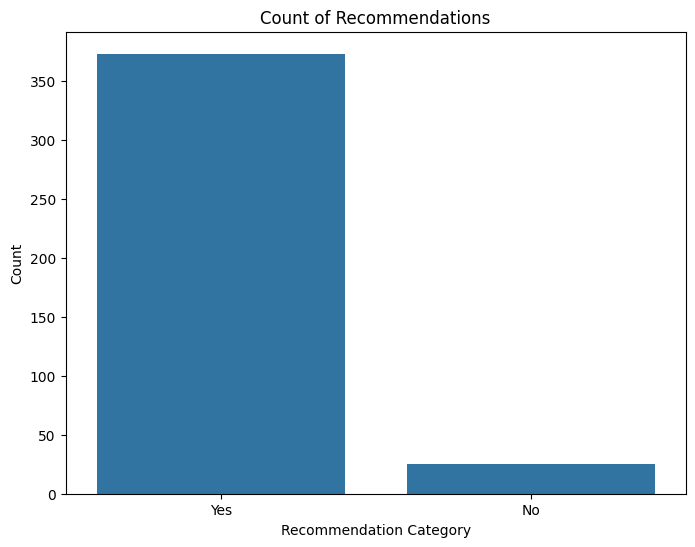

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: Displaying the count of each category in the 'recommendation' column
plt.figure(figsize=(8, 6))
sns.countplot(x='recommendation', data=data)
plt.title('Count of Recommendations')
plt.xlabel('Recommendation Category')
plt.ylabel('Count')
plt.show()


Index(['food_item', 'calories', 'proteins_(g)', 'carbohydrates_(g)', 'fat_(g)',
       'fiber_(g)', 'vitamin_c_(mg)', 'vitamin_a_(mg)', 'vitamin_d_(mg)',
       'health_condition', 'age', 'weight_(kg)', 'height_(cm)', 'bmi',
       'gender', 'recommendation'],
      dtype='object')


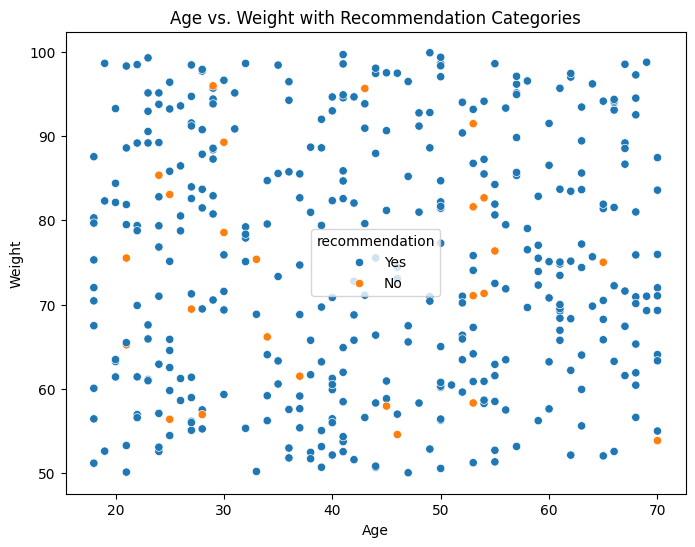

In [ ]:
# First, check the actual column names
print(data.columns)

# Scatter plot: Relationship between two numerical features (e.g., 'age' and the correct column for 'weight')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='weight_(kg)', hue='recommendation', data=data)
plt.title('Age vs. Weight with Recommendation Categories')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()


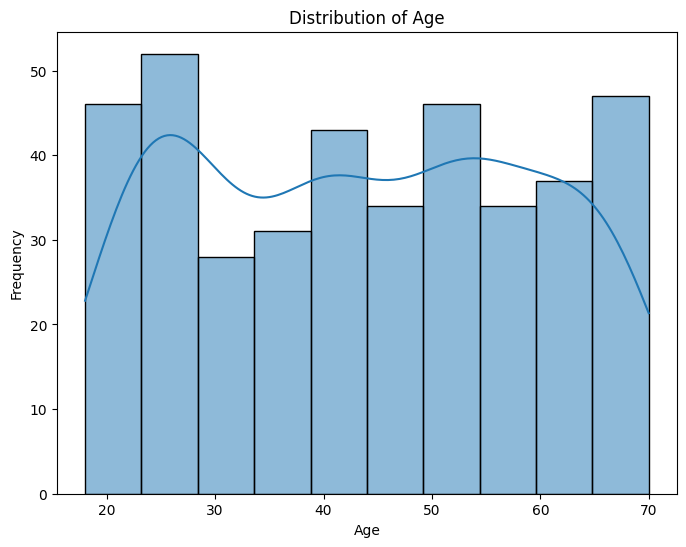

In [ ]:
# Histogram: Distribution of age in the dataset
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


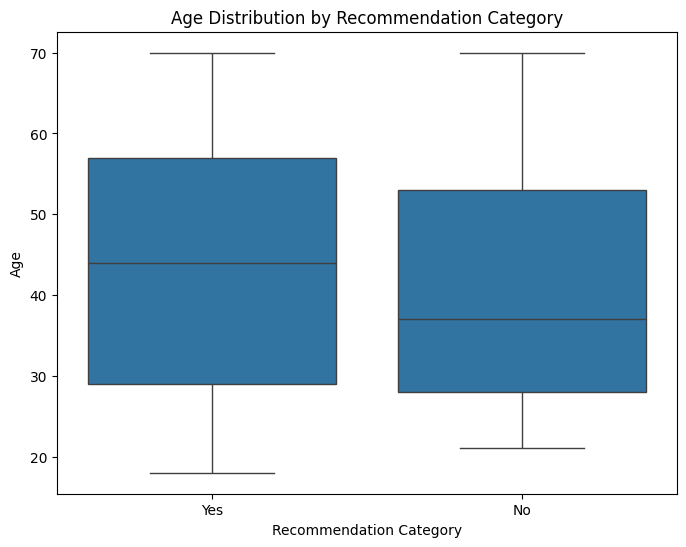

In [ ]:
# Box plot: Age distribution by recommendation category
plt.figure(figsize=(8, 6))
sns.boxplot(x='recommendation', y='age', data=data)
plt.title('Age Distribution by Recommendation Category')
plt.xlabel('Recommendation Category')
plt.ylabel('Age')
plt.show()
